<a href="https://colab.research.google.com/github/ShaishavMaisuria/CovidBigDataAnalysis/blob/main/Covid19-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing Dataset**##

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model   # Defines regression model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline



In [ ]:
df = pd.read_csv("enigma_covid_19_us_states.csv")
df.head()


,state_fips,state_name,lat,long,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
0,50,Vermont,44.068577,-72.669184,2020-06-19,1144,56,1144.0,54743.0,NaN,55887.0,NaN,8.0,NaN,918.0
1,50,Vermont,44.068577,-72.669184,2020-06-20,1147,56,1147.0,55881.0,NaN,57028.0,NaN,9.0,NaN,920.0
2,50,Vermont,44.068577,-72.669184,2020-06-21,1159,56,1159.0,56686.0,NaN,57845.0,NaN,11.0,NaN,922.0
3,50,Vermont,44.068577,-72.669184,2020-06-22,1163,56,1163.0,57444.0,NaN,58607.0,NaN,8.0,NaN,926.0
4,50,Vermont,44.068577,-72.669184,2020-06-23,1164,56,1164.0,58164.0,NaN,59328.0,NaN,19.0,NaN,927.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11619 entries, 0 to 11618
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state_fips      11619 non-null  int64  
 1   state_name      11619 non-null  object 
 2   lat             11619 non-null  float64
 3   long            11619 non-null  float64
 4   date            11619 non-null  object 
 5   cases           11619 non-null  int64  
 6   deaths          11619 non-null  int64  
 7   tests_positive  11359 non-null  float64
 8   tests_negative  11246 non-null  float64
 9   tests_pending   1259 non-null   float64
 10  tests           11392 non-null  float64
 11  patients_icu    5026 non-null   float64
 12  patients_hosp   8912 non-null   float64
 13  patients_vent   4207 non-null   float64
 14  recovered       8006 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 1.3+ MB


In [ ]:
df.shape

(11619, 15)

In [ ]:
df.describe()

,state_fips,lat,long,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
count,11619.000000,11619.000000,11619.000000,11619.000000,11619.000000,11359.000000,1.124600e+04,1259.000000,1.139200e+04,5026.000000,8912.000000,4207.000000,8006.000000
mean,31.845512,37.989736,-84.736642,51838.711507,1931.781995,52674.007043,5.875976e+05,1317.405878,6.474503e+05,311.394349,875.212410,137.394105,24328.162503
std,18.605290,8.413448,46.593479,103280.205868,4391.556990,102747.777003,1.233165e+06,5527.498999,1.325335e+06,561.287900,1668.279399,229.044119,52476.357852
min,1.000000,13.441745,-155.502443,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.000000
25%,17.000000,34.434684,-100.460826,1525.500000,34.000000,1843.500000,3.336300e+04,29.000000,3.367950e+04,56.000000,99.000000,26.000000,1269.250000
50%,31.000000,38.998566,-89.152611,13063.000000,385.000000,14170.000000,1.804030e+05,183.000000,2.050390e+05,134.000000,370.000000,74.000000,5937.000000
75%,46.000000,42.989659,-77.016517,56182.500000,1763.000000,57777.000000,6.036355e+05,623.500000,6.706362e+05,291.000000,884.000000,143.000000,29218.250000
max,78.000000,63.347356,145.601021,817939.000000,32743.000000,807425.000000,1.380612e+07,64400.000000,1.461354e+07,5225.000000,18825.000000,2425.000000,661038.000000


##**Data Preprocessing** ##

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11619 entries, 0 to 11618
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state_fips      11619 non-null  int64  
 1   state_name      11619 non-null  object 
 2   lat             11619 non-null  float64
 3   long            11619 non-null  float64
 4   date            11619 non-null  object 
 5   cases           11619 non-null  int64  
 6   deaths          11619 non-null  int64  
 7   tests_positive  11359 non-null  float64
 8   tests_negative  11246 non-null  float64
 9   tests_pending   1259 non-null   float64
 10  tests           11392 non-null  float64
 11  patients_icu    5026 non-null   float64
 12  patients_hosp   8912 non-null   float64
 13  patients_vent   4207 non-null   float64
 14  recovered       8006 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 1.3+ MB


In [ ]:
df['state_name'].isnull().count

<bound method Series.count of 0        False
1        False
2        False
3        False
4        False
         ...  
11614    False
11615    False
11616    False
11617    False
11618    False
Name: state_name, Length: 11619, dtype: bool>

In [ ]:
# Replacing null value with 0
df.fillna(0,inplace=True)

In [ ]:
# Converting columns to desired data type
df['year']= df['date'].str[0:3].astype(int)
df['month']= df['date'].str[5:7].astype(int)
df['state_name']= df['state_name'].astype('string')
df['tests_positive']= df['tests_positive'].astype(int)
df['tests_negative']= df['tests_negative'].astype(int)
df['tests_pending']= df['tests_pending'].astype(int)
df['tests']= df['tests'].astype(int)
df['patients_icu']= df['patients_icu'].astype(int)
df['patients_hosp']= df['patients_hosp'].astype(int)
df['patients_vent']= df['patients_vent'].astype(int)
df['recovered']= df['recovered'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11619 entries, 0 to 11618
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state_fips      11619 non-null  int64  
 1   state_name      11619 non-null  string 
 2   lat             11619 non-null  float64
 3   long            11619 non-null  float64
 4   date            11619 non-null  object 
 5   cases           11619 non-null  int64  
 6   deaths          11619 non-null  int64  
 7   tests_positive  11619 non-null  int64  
 8   tests_negative  11619 non-null  int64  
 9   tests_pending   11619 non-null  int64  
 10  tests           11619 non-null  int64  
 11  patients_icu    11619 non-null  int64  
 12  patients_hosp   11619 non-null  int64  
 13  patients_vent   11619 non-null  int64  
 14  recovered       11619 non-null  int64  
 15  year            11619 non-null  int64  
 16  month           11619 non-null  int64  
dtypes: float64(2), int64(13), objec

In [ ]:
df.head()

,state_fips,state_name,lat,long,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,year,month
0,50,Vermont,44.068577,-72.669184,2020-06-19,1144,56,1144,54743,0,55887,0,8,0,918,202,6
1,50,Vermont,44.068577,-72.669184,2020-06-20,1147,56,1147,55881,0,57028,0,9,0,920,202,6
2,50,Vermont,44.068577,-72.669184,2020-06-21,1159,56,1159,56686,0,57845,0,11,0,922,202,6
3,50,Vermont,44.068577,-72.669184,2020-06-22,1163,56,1163,57444,0,58607,0,8,0,926,202,6
4,50,Vermont,44.068577,-72.669184,2020-06-23,1164,56,1164,58164,0,59328,0,19,0,927,202,6


##**Data Correlation**##

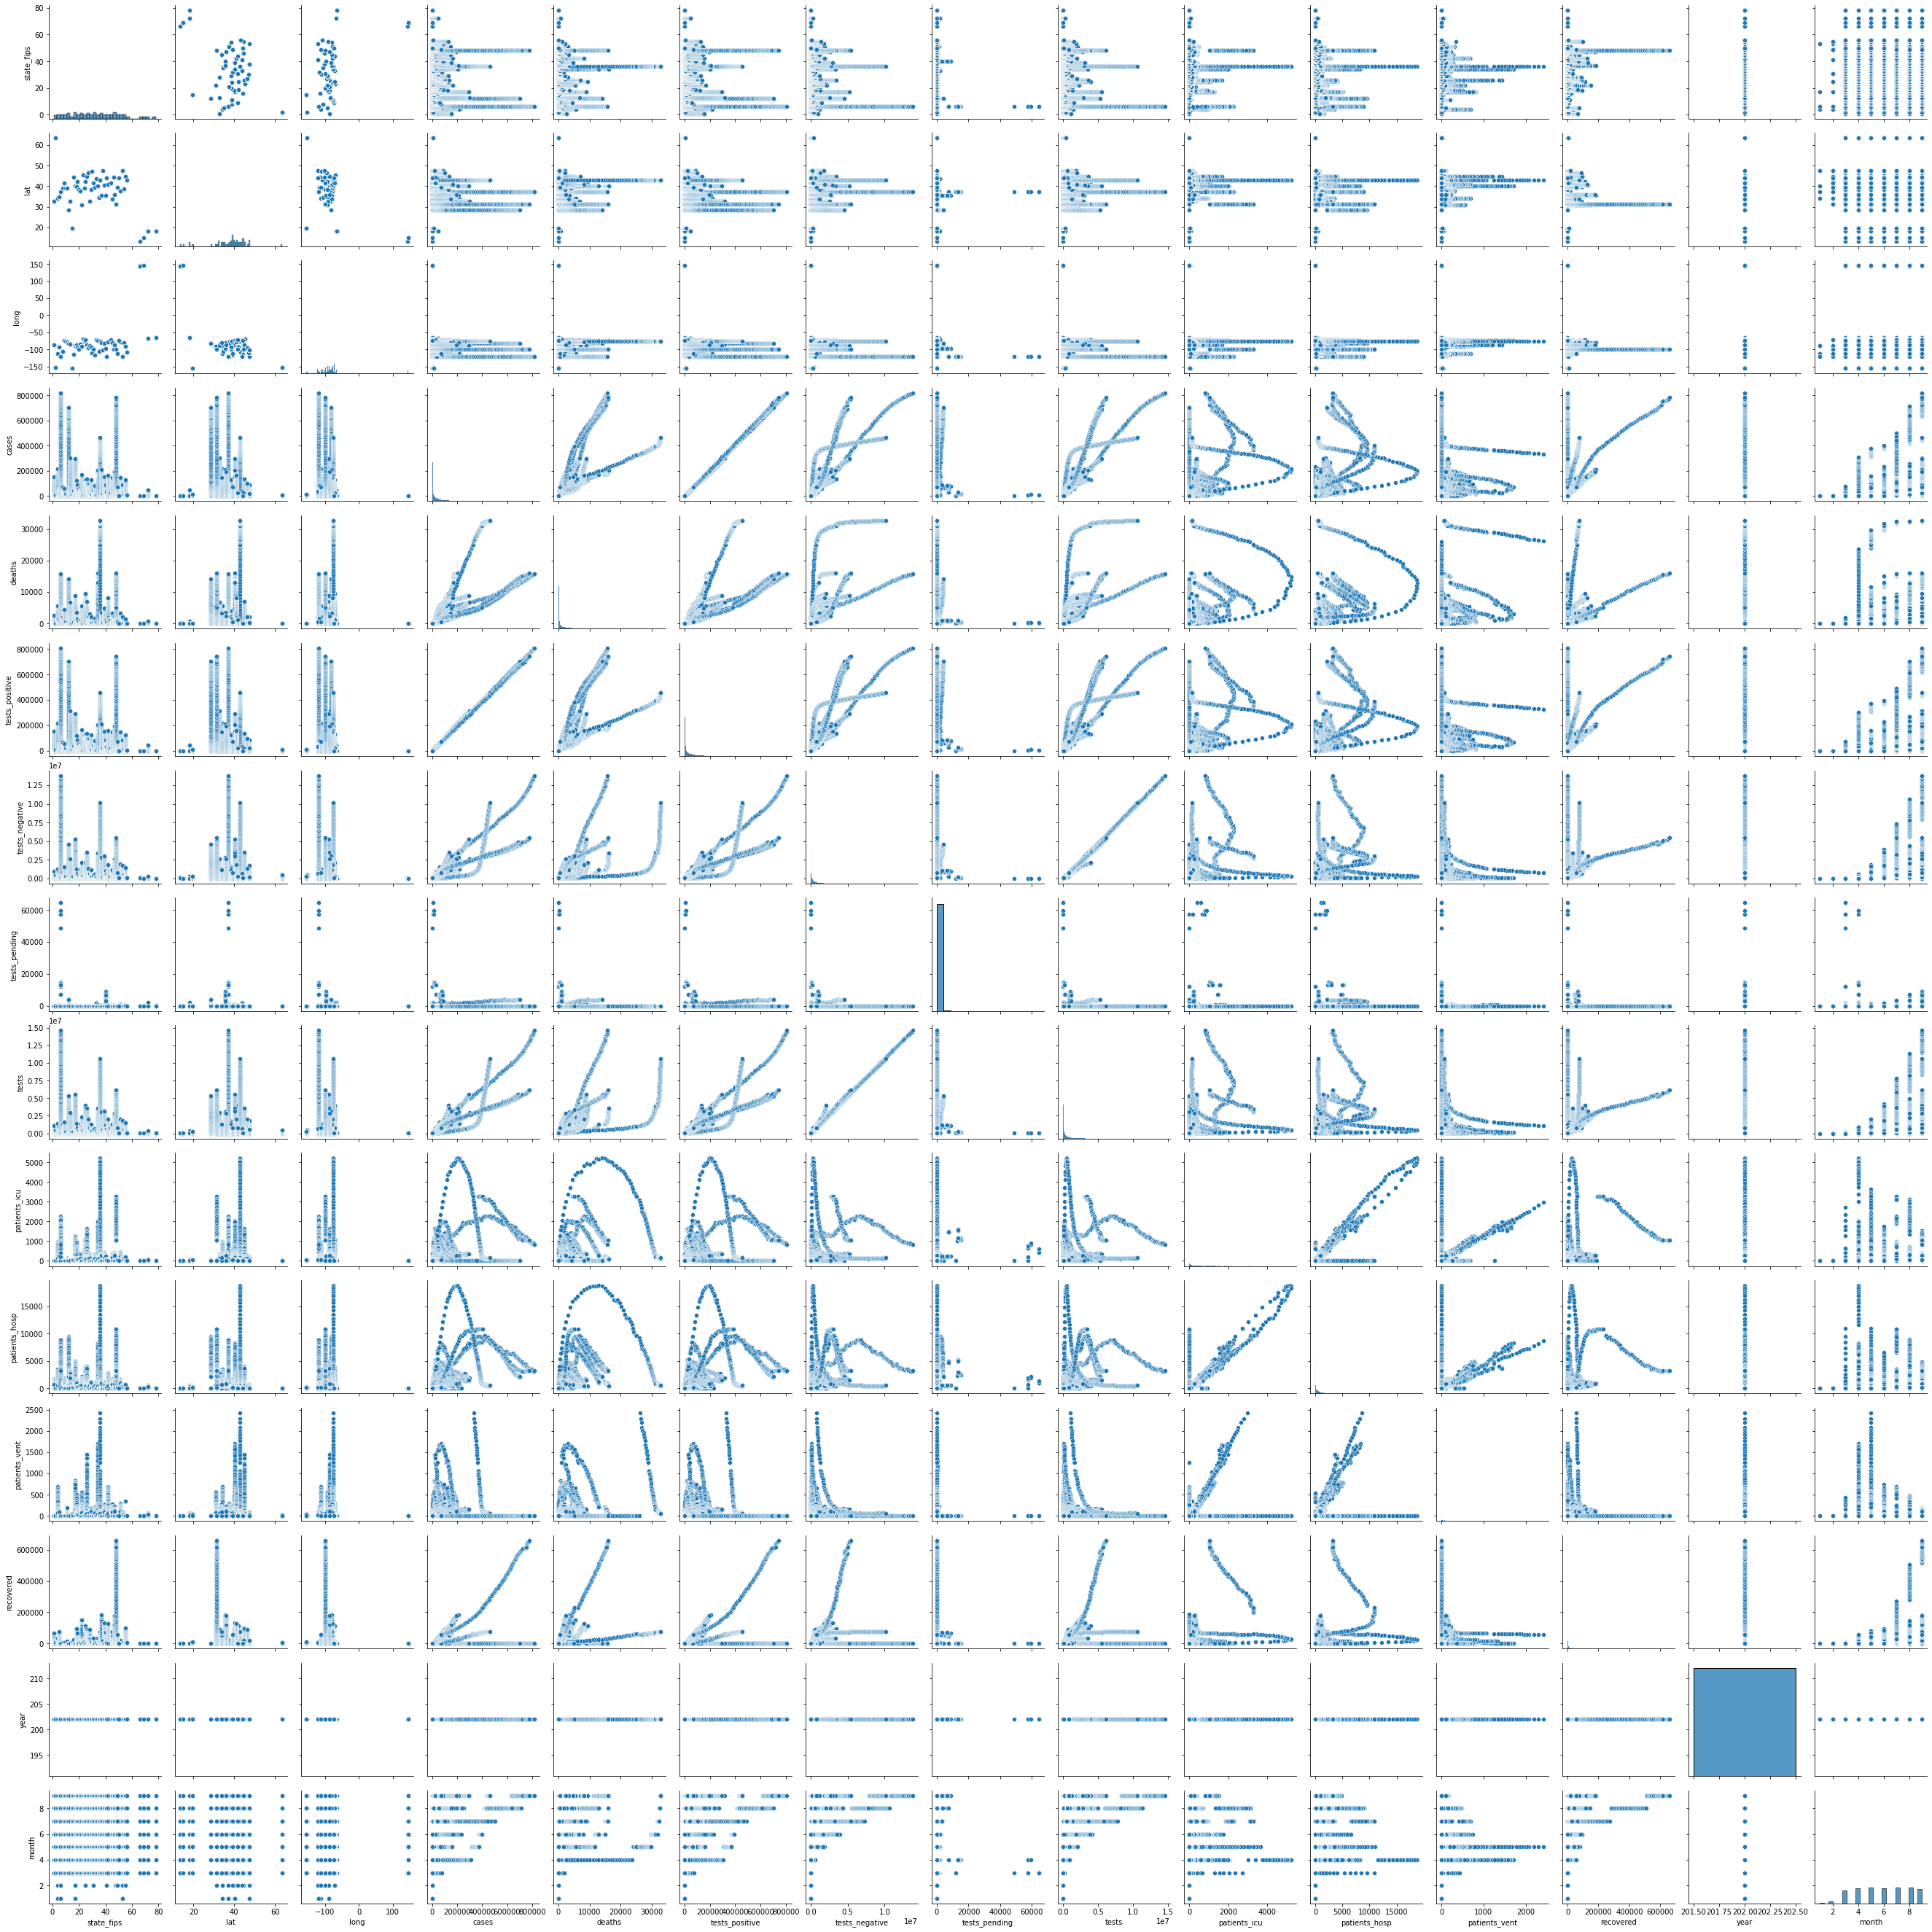

In [ ]:
# After loading in our data, we want to create a pairplot with our dataset to see the correlation
# between our independent variables and dependent variables. After creating our pairplot we realized that
# we have way too many independent variables and need to eliminate some to build our models
sns.pairplot(df)

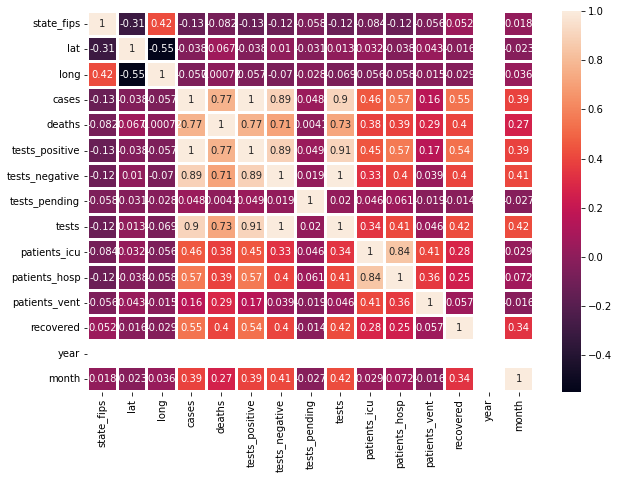

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

In [ ]:
df.to_csv('shaishav.csv',index=False)